In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv(r'1954319_113821.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-07-04,1954319,113821,201
2015-07-11,1954319,113821,200
2015-07-18,1954319,113821,18
2015-07-25,1954319,113821,226
2015-08-01,1954319,113821,320


In [4]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

KeyError: "['locid'] not found in axis"

In [5]:
df

,historyamount
historybegdate,
2015-07-04,201
2015-07-11,200
2015-07-18,18
2015-07-25,226
2015-08-01,320
2015-08-08,329
2015-08-15,418
2015-08-22,571
2015-08-29,464


In [6]:
df = df.iloc[3:]

In [7]:
df

,historyamount
historybegdate,
2015-07-25,226
2015-08-01,320
2015-08-08,329
2015-08-15,418
2015-08-22,571
2015-08-29,464
2015-09-05,513
2015-09-12,470
2015-09-19,452


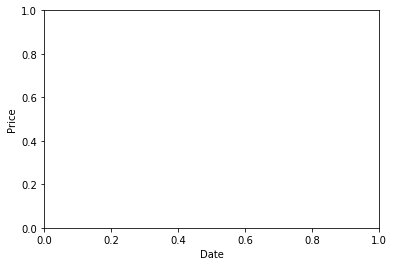

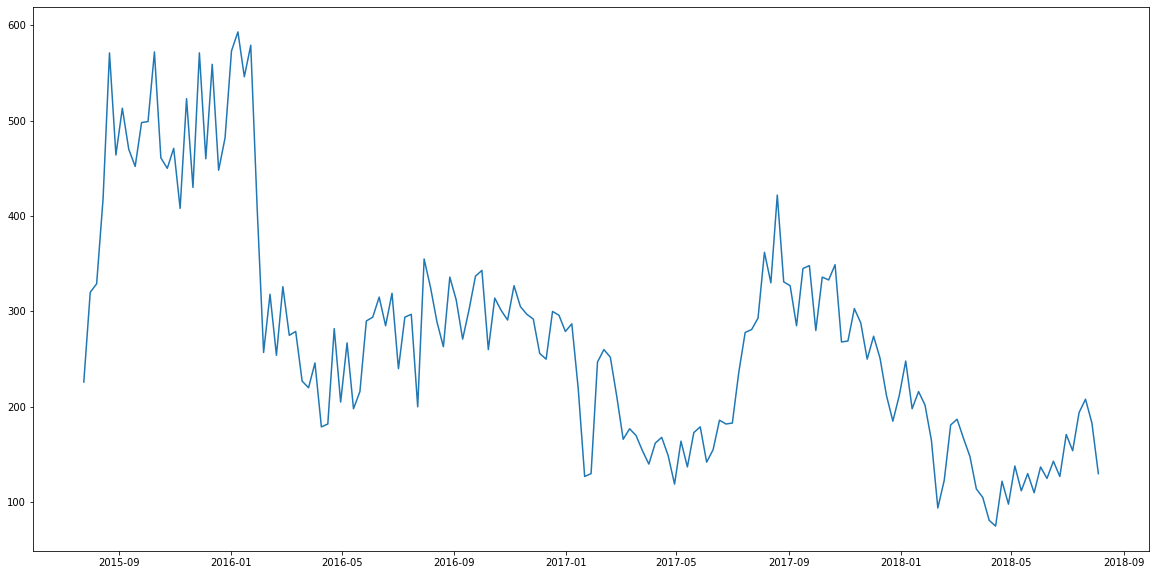

In [8]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [9]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-07-25                NaN
2015-08-01                NaN
2015-08-08                NaN
2015-08-15             323.25
2015-08-22             409.50
2015-08-29             445.50
2015-09-05             491.50
2015-09-12             504.50
2015-09-19             474.75
2015-09-26             483.25
2015-10-03             479.75
2015-10-10             505.25
2015-10-17             507.50
2015-10-24             495.50
2015-10-31             488.50
2015-11-07             447.50
2015-11-14             463.00
2015-11-21             458.00
2015-11-28             483.00
2015-12-05             496.00
159


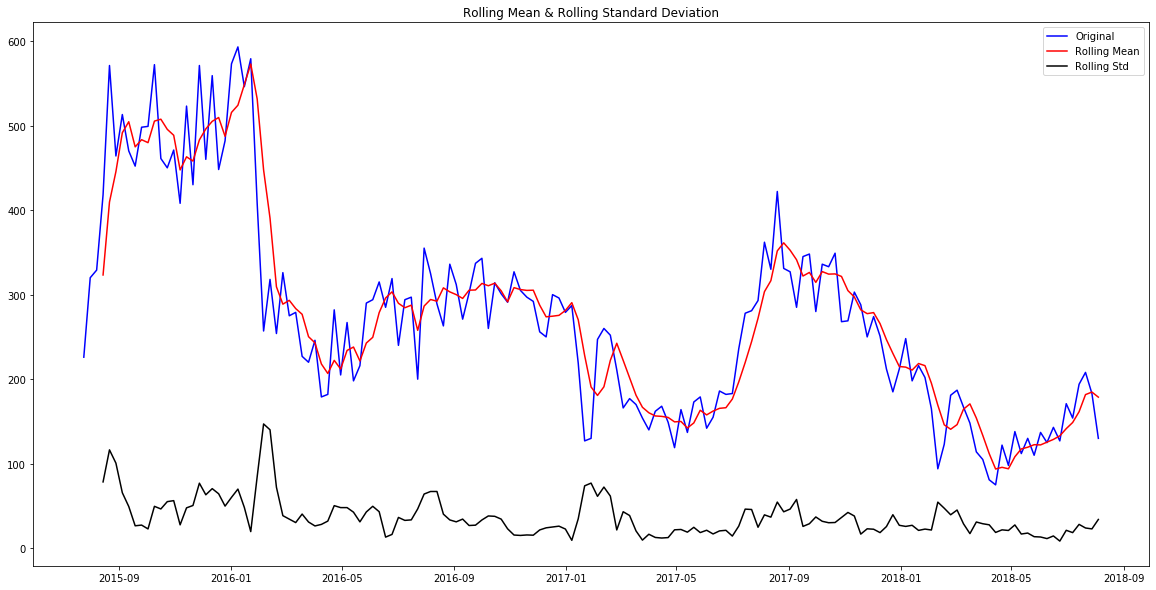

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [11]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.9002629553176773
p-value: 0.33193741835128654
No. OF Lags USed: 1
No. OF Observations USed: 157
Critical Values:
	1%: -3.472703119504854
	5%: -2.880131672353732
	10%: -2.5766826861130268


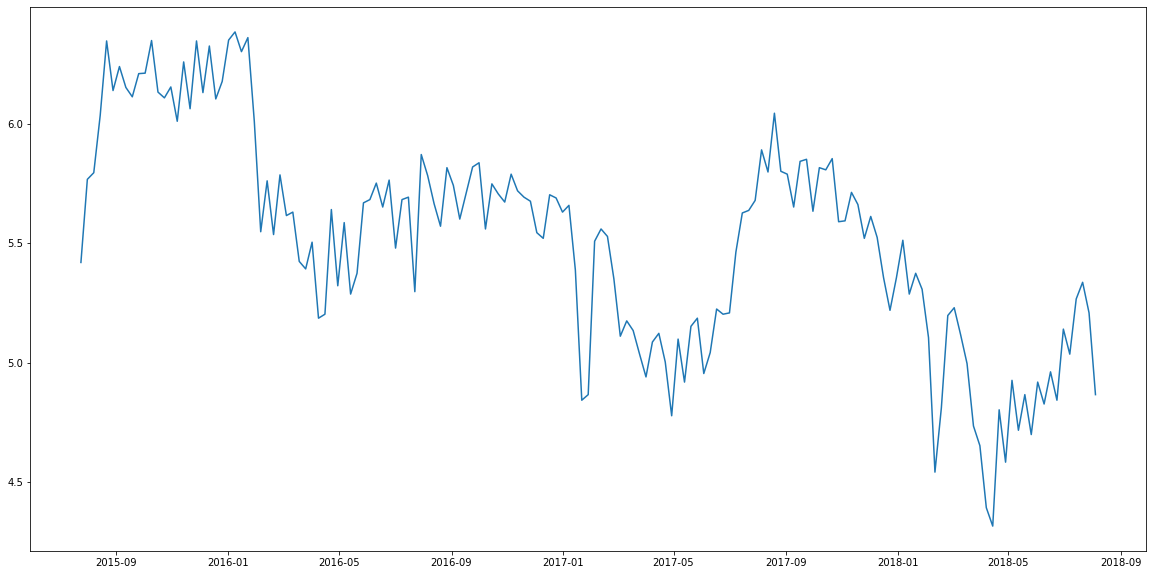

In [12]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [13]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

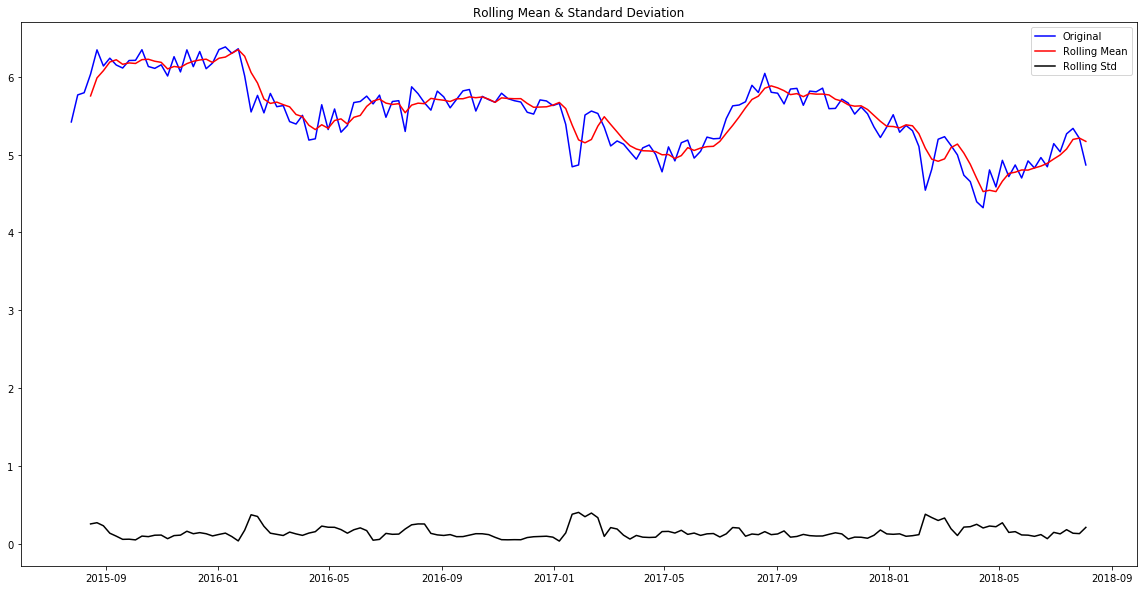

ADF Statistic: -2.0612015269310944
p-value: 0.2603989942777616
No. OF Lags USed: 1
No. OF Observations USed: 157
Critical Values:
	1%: -3.472703119504854
	5%: -2.880131672353732
	10%: -2.5766826861130268


In [14]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

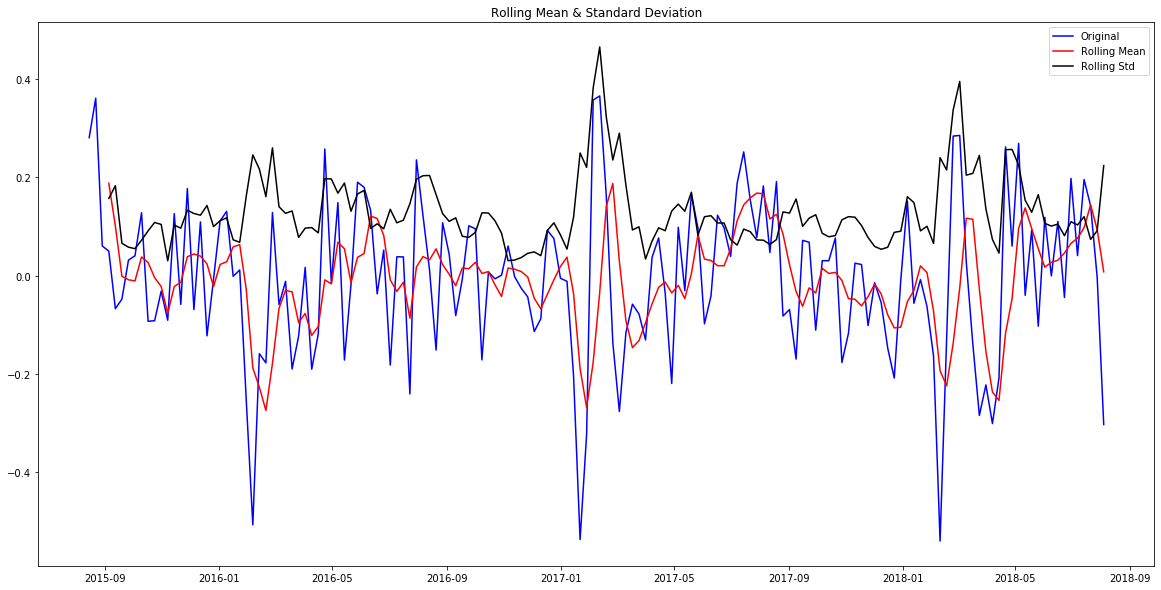

ADF Statistic: -3.948016297544842
p-value: 0.0017085580050311554
No. OF Lags USed: 6
No. OF Observations USed: 149
Critical Values:
	1%: -3.4750180242954167
	5%: -2.8811408028842043
	10%: -2.577221358046935


In [16]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

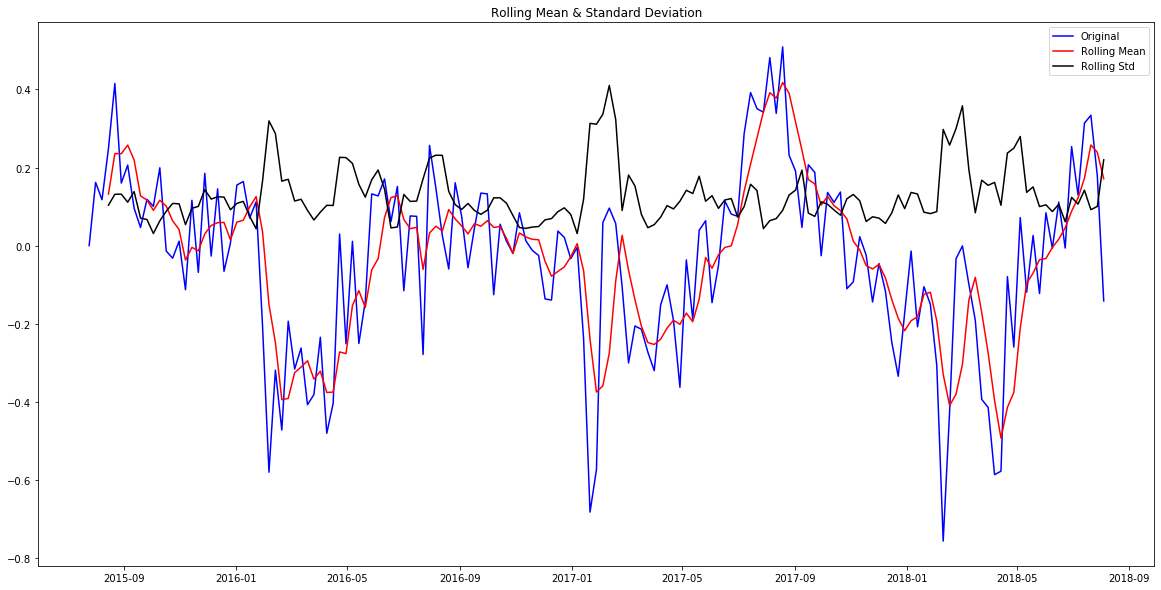

ADF Statistic: -4.37381187992737
p-value: 0.0003301631946165288
No. OF Lags USed: 1
No. OF Observations USed: 157
Critical Values:
	1%: -3.472703119504854
	5%: -2.880131672353732
	10%: -2.5766826861130268


In [17]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

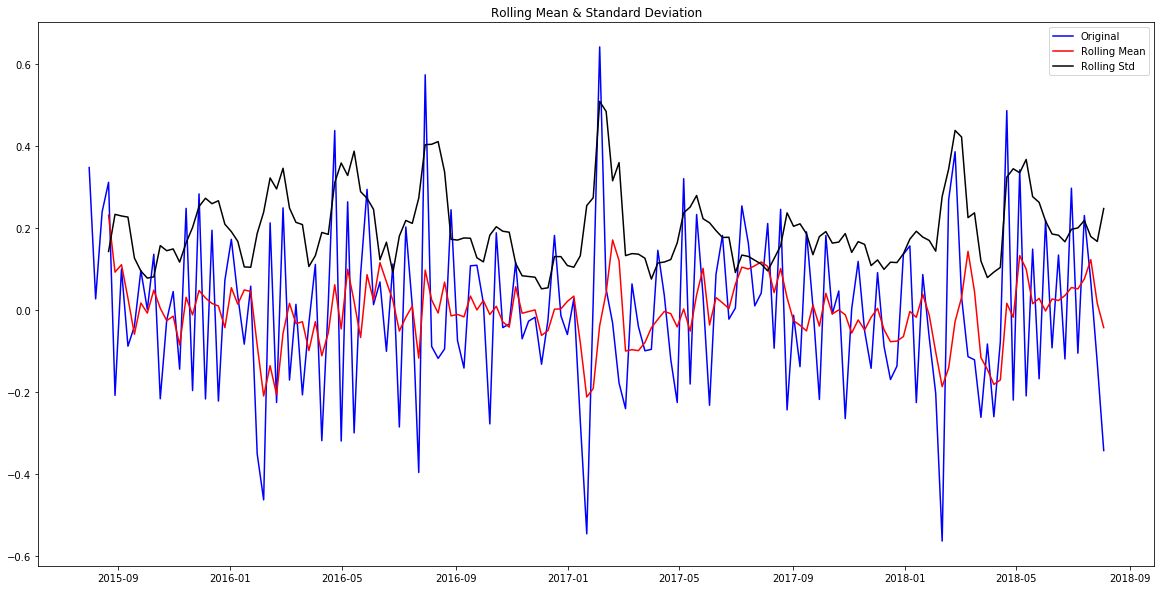

ADF Statistic: -9.129837941059021
p-value: 3.043050602032572e-15
No. OF Lags USed: 2
No. OF Observations USed: 155
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525


In [18]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

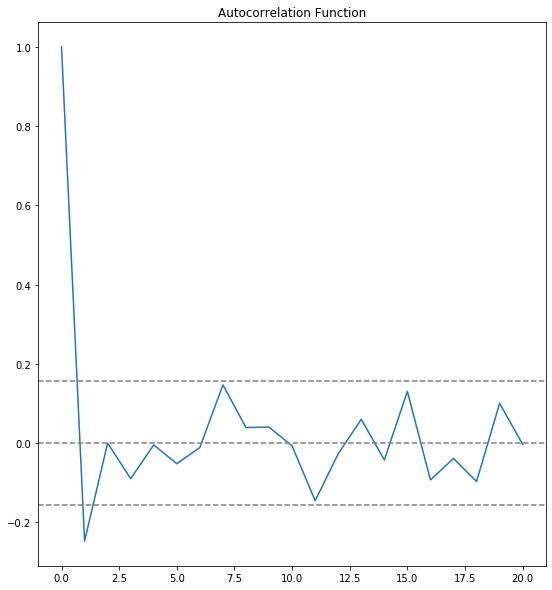

In [20]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

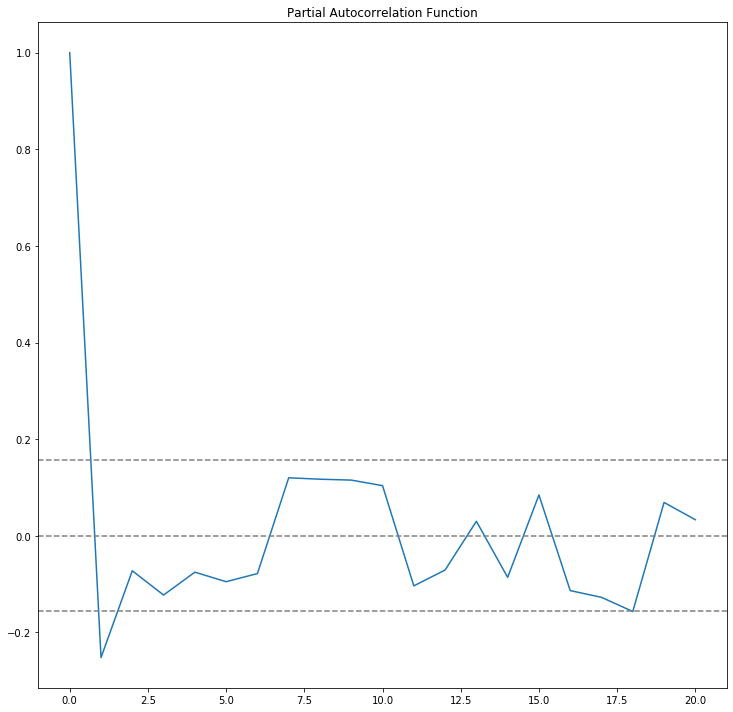

In [21]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  -59.64553252836737
Plotting AR Model


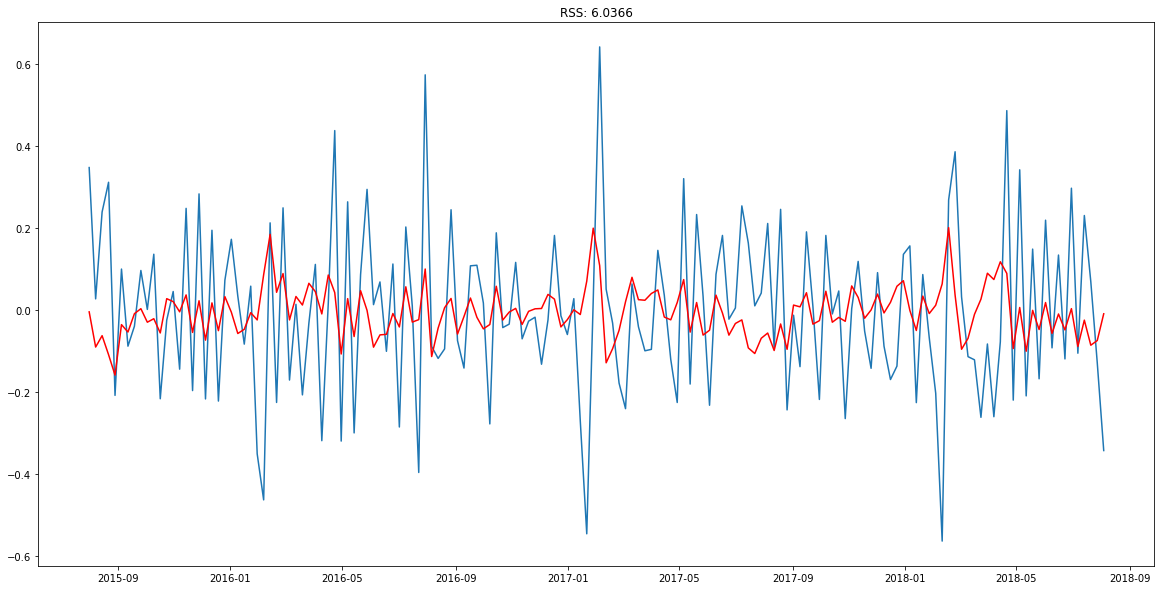

In [22]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(1,1,1))# (p,d,q)
results = model.fit()
print('aic value for this model is ',results.aic)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
#plt.title(sum(results.fittedvalues-df_log_shift['historyamount'])**2)
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_shift['historyamount'])**2))
print('Plotting AR Model')

In [23]:
df_log_forecast = results.forecast(steps=52)[0]
print(df_log_forecast)

[4.96064979 4.9854404  4.98999682 4.98856092 4.98535042 4.98161438
 4.9777227  4.97378492 4.96983349 4.96587803 4.96192136 4.95796434
 4.95400722 4.95005006 4.9460929  4.94213573 4.93817856 4.93422139
 4.93026422 4.92630705 4.92234989 4.91839272 4.91443555 4.91047838
 4.90652121 4.90256404 4.89860687 4.8946497  4.89069254 4.88673537
 4.8827782  4.87882103 4.87486386 4.87090669 4.86694952 4.86299235
 4.85903519 4.85507802 4.85112085 4.84716368 4.84320651 4.83924934
 4.83529217 4.831335   4.82737784 4.82342067 4.8194635  4.81550633
 4.81154916 4.80759199 4.80363482 4.79967765]


In [28]:
final_prediction = np.exp(df_log_forecast)
print(final_prediction)
rng = pd.date_range(start = "9/22/2018",end = "9/20/2019",freq='W')
csv_data = pd.Series(final_prediction,index=rng)
print(type(csv_data))
print(csv_data)

[142.68648215 146.2679775  146.93595557 146.72512271 146.25481718
 145.70942213 145.14346916 144.5730506  144.00290814 143.43443429
 142.86803354 142.30381897 141.74181771 141.18203158 140.62445494
 140.06907998 139.51589827 138.96490124 138.41608028 137.86942681
 137.32493225 136.7825881  136.24238585 135.70431705 135.16837327
 134.63454613 134.10282725 133.57320831 133.04568103 132.52023713
 131.9968684  131.47556663 130.95632367 130.43913138 129.92398166
 129.41086644 128.8997777  128.39070743 127.88364765 127.37859043
 126.87552786 126.37445205 125.87535517 125.3782294  124.88306695
 124.38986007 123.89860104 123.40928216 122.92189577 122.43643424
 121.95288997 121.47125539]
<class 'pandas.core.series.Series'>
2018-09-23    142.686482
2018-09-30    146.267977
2018-10-07    146.935956
2018-10-14    146.725123
2018-10-21    146.254817
2018-10-28    145.709422
2018-11-04    145.143469
2018-11-11    144.573051
2018-11-18    144.002908
2018-11-25    143.434434
2018-12-02    142.868034
2

In [29]:
import os
path=r'C:\Users\80071\Desktop\PTC_Forecast'
csv_data.to_csv(os.path.join(path,r'1954319_113821_forecast.csv'))

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


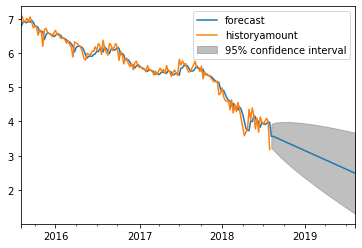

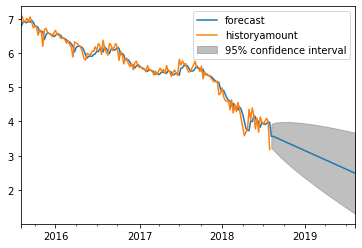

In [51]:
results.plot_predict(1,212)